In [1]:
import torch.nn as nn
import torch
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [2]:
import pandas as pd
# 생성모델
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.0001)
        self.counter = 0
        self.progress = []
    
    def forward(self, inputs):
        return self.model(inputs.to(DEVICE))
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs.to(DEVICE))
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets.to(DEVICE))
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))

In [3]:
G=torch.load('final_G.h5')
G.to(DEVICE)

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=200, bias=True)
    (1): LeakyReLU(negative_slope=0.02)
    (2): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
    (3): Linear(in_features=200, out_features=784, bias=True)
    (4): Sigmoid()
  )
)

In [4]:
#학습된 가중치 확인
print(G.model[3].weight[0][:10])
print(G.model[3].bias[:10])

tensor([-0.1824, -0.0151, -0.0939,  0.2924,  0.0319,  0.2362,  0.1372, -0.0187,
        -0.1779, -0.0858], device='cuda:0', grad_fn=<SliceBackward0>)
tensor([-0.3144, -0.2931, -0.3821, -0.3161, -0.3716, -0.3532, -0.3990, -0.2818,
        -0.3520, -0.4434], device='cuda:0', grad_fn=<SliceBackward0>)


In [5]:
def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

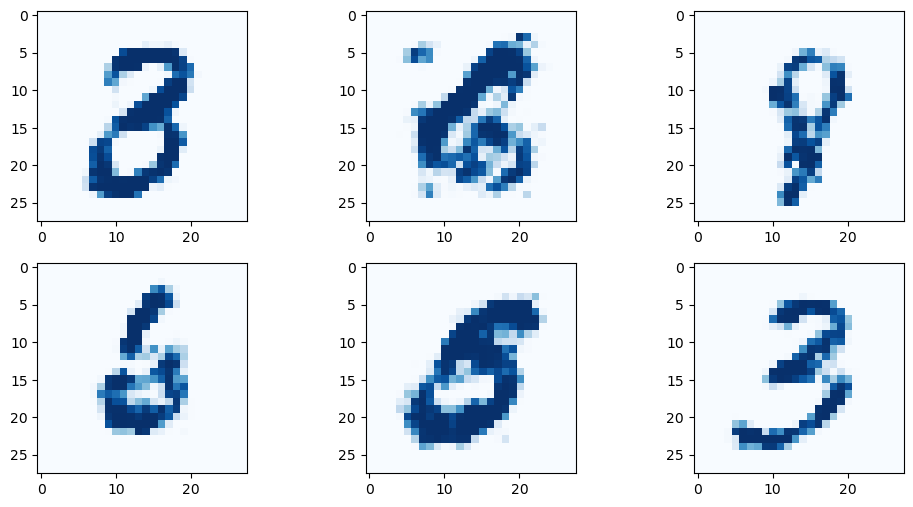

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
count = 0
f, axarr = plt.subplots(2,3, figsize=(12,6))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random_seed(100))
        img = output.cpu().detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

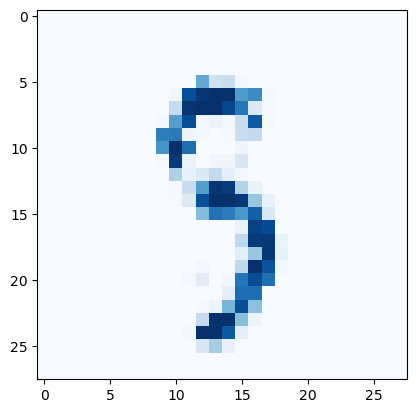

In [7]:
seed1 = generate_random_seed(100)
out1 = G.forward(seed1)
img1 = out1.cpu().detach().numpy().reshape(28,28)
plt.imshow(img1, cmap='Blues')
plt.show()

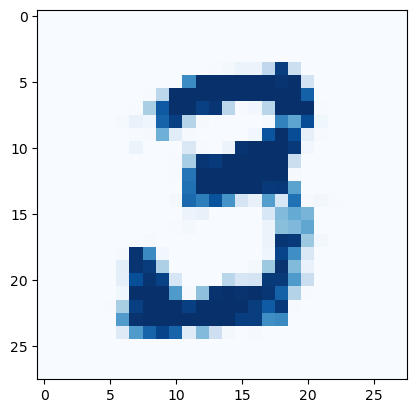

In [8]:
seed2 = generate_random_seed(100)
out2 = G.forward(seed2)
img2 = out2.cpu().detach().numpy().reshape(28,28)
plt.imshow(img2, cmap='Blues')
plt.show()

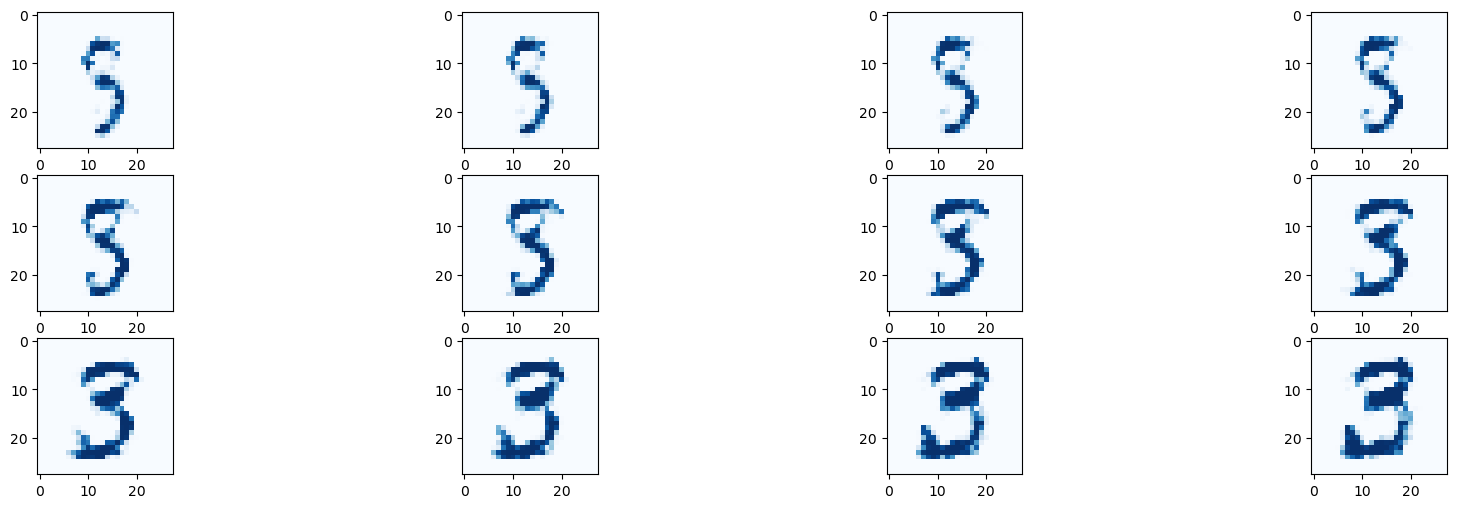

In [9]:
count = 0
f, axarr = plt.subplots(3,4, figsize=(21,6))
for i in range(3):
    for j in range(4):
        seed = seed1 + (seed2 - seed1)/11 * count
        output = G.forward(seed)
        img = output.cpu().detach().numpy().reshape(28,28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        count = count + 1
        pass
    pass

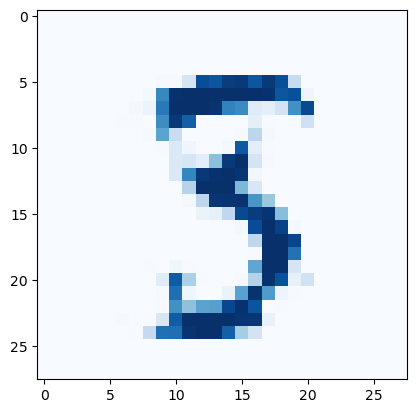

In [10]:
# sum of seeds
seed3 = seed1 + seed2
out3 = G.forward(seed3)
img3 = out3.cpu().detach().numpy().reshape(28,28)
plt.imshow(img3, cmap='Blues')
plt.show()

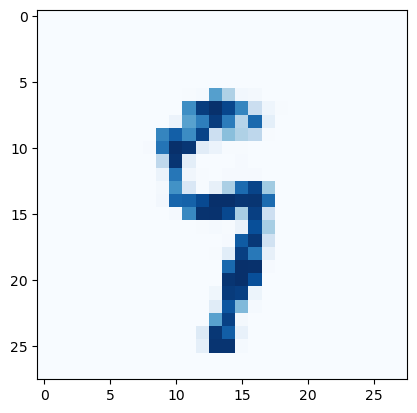

In [11]:
# difference of seeds
seed4 = seed1 - seed2
out4 = G.forward(seed4)
img4 = out4.cpu().detach().numpy().reshape(28,28)
plt.imshow(img4, cmap='Blues')
plt.show()

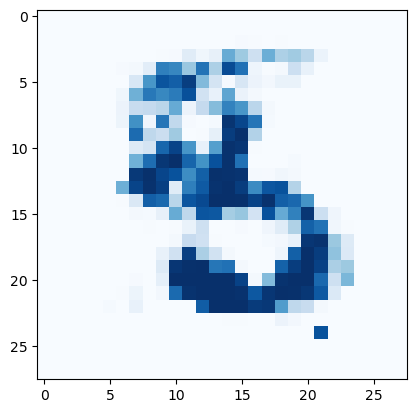

In [12]:
seed4 = seed1 * seed2
out4 = G.forward(seed4)
img4 = out4.cpu().detach().numpy().reshape(28,28)
plt.imshow(img4, cmap='Blues')
plt.show()